In [1]:
# Import necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np 

# Import libraries for data visualization
import seaborn as sns  
import matplotlib.pyplot as plt  

# Import utilities for handling date and time
from datetime import datetime 

# Import operating system utilities
import os 

# Import libraries for clustering and evaluation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score  
from sklearn.cluster import KMeans, AgglomerativeClustering 
from scipy.cluster.hierarchy import dendrogram, linkage

# Import libraries for data preprocessing
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import LabelEncoder 

# Import libraries for model selection and hyperparameter tuning
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

# Import regression models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet  
from sklearn.svm import SVR  
from sklearn.neighbors import KNeighborsRegressor  

# Import evaluation metric
from sklearn.metrics import mean_squared_error 

# 1. Exploratory data analysis
#### This data set contains of 1067371 entries and 8 columns:
* Invoice: Invoice number. Nominal. A 6-digit integer uniquely assigned to each transaction. If this code begins with the letter 'c' then it indicates cancellation.
* StockCode: Product code (item). Nominal. A 5-digit integer uniquely assigned to each individual product.
* Description: Product name (item). Nominal.
* Quantity: Quantity of each product (item) per transaction. Number.
* InvoiceDate: Invoice date and time. Number. Date and time when the transaction was created.
* Price: Unit price. Number. Product price per unit is in British pounds (£).
* Customer ID: Customer code. Nominal. A 5-digit integer uniquely assigned to each customer.
* Country: Country name. Nominal. Name of the country where the customer resides.

## 1.1. Data Loading and Descriptive Analysis

In [2]:
dt = pd.concat(pd.read_excel("../data/online_retail_II.xlsx", sheet_name=None).values())
dt.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [3]:
dt.shape

(1067371, 8)

#### Display the first 10 rows of data

In [4]:
dt.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


#### Display 10 random rows of the data to check for cleanliness of the data set

In [5]:
dt.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
159696,550352,17091A,LAVENDER INCENSE IN TIN,4,2011-04-18 10:21:00,0.38,16719.0,United Kingdom
319276,564846,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2011-08-30 15:16:00,4.95,14507.0,United Kingdom
79748,543001,22024,RAINY LADIES BIRTHDAY CARD,12,2011-02-02 12:26:00,0.42,14127.0,United Kingdom
266588,560260,20725,LUNCH BAG RED RETROSPOT,1,2011-07-17 13:32:00,1.65,14044.0,United Kingdom
123023,546891,22811,SET OF 6 T-LIGHTS CACTI,1,2011-03-17 18:18:00,5.79,NaN,United Kingdom
299841,563174,23289,DOLLY GIRL CHILDRENS BOWL,8,2011-08-12 13:40:00,1.25,16746.0,United Kingdom
503249,578921,21615,4 LAVENDER BOTANICAL DINNER CANDLES,1,2011-11-27 11:57:00,1.25,13596.0,United Kingdom
308044,563935,21159,MOODY BOY DOOR HANGER,7,2011-08-21 16:24:00,0.39,15547.0,United Kingdom
480826,534459,21624,VINTAGE UNION JACK DOORSTOP,1,2010-11-23 09:12:00,11.87,NaN,United Kingdom
56573,541104,21773,DECORATIVE ROSE BATHROOM BOTTLE,6,2011-01-13 14:29:00,1.25,NaN,United Kingdom


#### What we can observe from this is that there are missing values in **CustomerID** column. Upon further inspection with the *.info()* function, we can see that there are also missing values in the **Description** column

In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


#### In fact, almost 20% of the rows are missing with **CustomerID** values which is a huge number and can greatly affect the result of this analysis. Another problem is that the data type of **CustomerID** should be int with 5 digits rather that float type. Aside from that, the data seems to be cleaned.

#### We then use the *.describe()* funtion to show the summary statistics such as *mean, median, quarticles,...* for the numerical columns, specifically the **Quantity** and the **Price** columns. These 2 columns have the minimum values to be negative which is impossible siince you cannot than 0 items or/and for negative price.

In [7]:
dt[["Quantity", "Price"]].describe()

,Quantity,Price
count,1.067371e+06,1.067371e+06
mean,9.938898e+00,4.649388e+00
std,1.727058e+02,1.235531e+02
min,-8.099500e+04,-5.359436e+04
25%,1.000000e+00,1.250000e+00
50%,3.000000e+00,2.100000e+00
75%,1.000000e+01,4.150000e+00
max,8.099500e+04,3.897000e+04


#### We then move to the non-numerical columns with unique values which is the **Country** column. The functions return 43 indicates that there are 43 countries in this column and most of them are from Europe.

In [8]:
dt["Country"].nunique()

43

In [9]:
dt["Country"].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland', 'Saudi Arabia',
       'Czech Republic', 'European Community'], dtype=object)

#### Almost 92% of the transaction are coming from United Kingdom.

In [10]:
dt["Country"].value_counts(normalize=True).head(10) * 100

Country
United Kingdom    91.938979
EIRE               1.673832
Germany            1.651160
France             1.342551
Netherlands        0.481557
Spain              0.357045
Switzerland        0.298771
Belgium            0.292588
Portugal           0.245463
Australia          0.179225
Name: proportion, dtype: float64

#### There are some missing values in column **Description** and **CustomerID**. 

#### We will start dealing with the missing values in **Description** column.

In [11]:
dt["Description"].isnull().mean() * 100

np.float64(0.4105414143723223)

#### 0.41% of the **Description** column have missing values.

In [12]:
dt[dt["Description"].isnull()].sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
43622,493161,22144,NaN,21,2009-12-22 11:48:00,0.0,NaN,United Kingdom
193647,507811,10124C,NaN,-5,2010-05-11 12:51:00,0.0,NaN,United Kingdom
13960,537438,22959,NaN,13,2010-12-06 17:00:00,0.0,NaN,United Kingdom
35499,492366,17013B,NaN,-45,2009-12-16 13:57:00,0.0,NaN,United Kingdom
429450,530401,21268,NaN,6,2010-11-02 18:01:00,0.0,NaN,United Kingdom
52216,540695,21661,NaN,1,2011-01-11 09:14:00,0.0,NaN,United Kingdom
43523,493120,72045D,NaN,520,2009-12-22 11:28:00,0.0,NaN,United Kingdom
120763,546673,23348,NaN,48,2011-03-15 16:11:00,0.0,NaN,United Kingdom
408189,528455,20703,NaN,-36,2010-10-22 11:31:00,0.0,NaN,United Kingdom
44613,493293,21560,NaN,3,2009-12-22 15:15:00,0.0,NaN,United Kingdom


#### Upon inspecting the first 10 rows of the rows that contain NaN values in **Description** column, it seams like the rows containing missing values in **Description** column also have negative values for **Quantity**, alot of 0.0 for **Price** and missing values for **CustomerID**

#### We will further inspect this bit of data by diving deeper into the above thesis.

In [13]:
np.all(dt[dt["Description"].isnull()]["Customer ID"].isnull())

np.True_

#### All of the NaN value **Description** rows also have NaN value for their corresponding **CustomerID**.

In [14]:
(dt[dt["Description"].isnull()]["Quantity"] <= 0).mean() * 100

np.float64(61.364673664993155)

#### Around 61% of the NaN value **Description** rows have the **Quantity** of equal or less than 0.

In [15]:
all(dt[dt["Description"].isnull()]["Country"] == "United Kingdom")

True

#### All of the NaN value **Description** rows are correspoding to the **Country** United Kingdom.

In [16]:
all(dt[dt["Description"].isnull()]["Price"] == 0.0)

True

#### All of the NaN value **Description** rows have the price of 0.0

## 1.2. Data Cleaning

#### Now we will proceed to deal with missing values in **CustomerID** column.

In [17]:
dt["Customer ID"].isnull().mean() * 100

np.float64(22.766872999172733)

#### Around 23% of **CustomerID** rows are absence with values.

In [18]:
dt[dt["Customer ID"].isnull()].sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
30866,491969,22250,DECORATION BUTTERFLY MAGIC GARDEN,2,2009-12-14 17:57:00,1.70,NaN,United Kingdom
302629,563439,23208,LUNCH BAG VINTAGE LEAF DESIGN,1,2011-08-16 13:05:00,4.96,NaN,United Kingdom
514200,537240,22403,MAGNETS PACK OF 4 VINTAGE LABELS,1,2010-12-06 10:08:00,2.51,NaN,United Kingdom
261155,559817,22297,HEART IVORY TRELLIS SMALL,1,2011-07-12 16:20:00,2.46,NaN,United Kingdom
244692,513099,22353,LUNCH BOX WITH CUTLERY FAIRY CAKES,4,2010-06-21 15:13:00,5.06,NaN,United Kingdom
21130,538071,22831,WHITE BROCANTE SOAP DISH,1,2010-12-09 14:09:00,5.91,NaN,United Kingdom
386812,526638,20718,RED RETROSPOT SHOPPER BAG,1,2010-10-12 13:19:00,2.51,NaN,United Kingdom
478403,577078,22666,RECIPE BOX PANTRY YELLOW DESIGN,2,2011-11-17 15:17:00,5.79,NaN,United Kingdom
323278,565286,22699,ROSES REGENCY TEACUP AND SAUCER,1,2011-09-02 11:39:00,5.79,NaN,United Kingdom
220884,556237,21455,PAINTED YELLOW WOODEN DAISY,1,2011-06-09 15:34:00,0.83,NaN,United Kingdom


In [19]:
dt[dt["Customer ID"].isnull()]["Description"].nunique()

4872

In [20]:
(dt[dt["Customer ID"].isnull()]["Quantity"] <= 0).mean() * 100

np.float64(1.7308143386816017)

In [21]:
(dt[dt["Customer ID"].isnull()]["Price"] <= 0.0).mean() * 100

np.float64(2.5250301431646003)

#### There are no obvious pattern for why there are missing values in **CustomerID** column

#### Next we will analyze the negative values of **Quantity** and **Price** columns

In [22]:
(dt["Price"] <= 0).mean() * 100

np.float64(0.5815222635803297)

In [23]:
(dt["Quantity"] <= 0).mean() * 100

np.float64(2.1501427338760375)

In [24]:
(dt[["Quantity", "Price"]] <= 0).any(axis=1).mean() * 100

np.float64(2.4077851093949527)

#### There are no rows that contain negative values on both Quantity and Price column.

#### Around 0.6% of **Price** values are missing and 2.1% of **Quatity**  values are missing 

In [25]:
dt[dt["Quantity"] <= 0].sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
198052,C554004,22138,BAKING SET 9 PIECE RETROSPOT,-2,2011-05-20 12:21:00,4.95,15367.0,United Kingdom
155865,C550026,23076,ICE CREAM SUNDAE LIP GLOSS,-4,2011-04-14 11:22:00,1.25,14339.0,United Kingdom
145781,C548908,72807A,SET/3 ROSE CANDLE IN JEWELLED BOX,-1,2011-04-05 08:25:00,4.25,18108.0,United Kingdom
313488,C519893,82494L,WOODEN FRAME ANTIQUE WHITE,-3,2010-08-22 12:58:00,2.55,15311.0,United Kingdom
145576,C503211,20932,PINK POT PLANT CANDLE,-1,2010-03-30 16:00:00,3.75,14175.0,United Kingdom
399999,527668,35817B,NaN,-1,2010-10-18 14:36:00,0.00,NaN,United Kingdom
487640,C535013,22776,SWEETHEART CAKESTAND 3 TIER,-1,2010-11-24 15:55:00,9.95,15164.0,United Kingdom
234396,C557515,22470,HEART OF WICKER LARGE,-2,2011-06-20 17:05:00,2.95,17463.0,United Kingdom
109013,C499869,22138,BAKING SET 9 PIECE RETROSPOT,-1,2010-03-02 17:23:00,4.95,15673.0,United Kingdom
422516,C573092,23207,LUNCH BAG ALPHABET DESIGN,-66,2011-10-27 14:38:00,1.45,13791.0,United Kingdom


In [26]:
dt[dt["Quantity"] <= 0]["Invoice"].astype("str").str.startswith("C").mean() * 100

np.float64(84.93681917211329)

In [27]:
(dt[dt["Invoice"].astype("str").str.startswith("C")]["Quantity"] <= 0.).mean() * 100

np.float64(99.99487021647685)

#### By taking a look at the **Invoice** column, there is a C at the beginning in most of the values. Which can be understanded that these orders were cancelled.

#### Next, we will create an additional column called **TotalPrice** calculated by **Quantity** multiplied by **Price**. Rows with the **TotalPrice** equal or less than 0 will be dropped.

In [28]:
dt["TotalPrice"] = dt["Quantity"] * dt["Price"]

In [29]:
(dt["TotalPrice"] <= 0).mean() * 100

np.float64(2.4077851093949527)

#### Around 2.4% of the data consist of rows that have the total price equal or less than 0.

In [30]:
dt[dt["TotalPrice"] <= 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,-9.90
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,-17.00
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,-12.60
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


#### There are approximately 25700 rows that will be dropped to clean the data.

#### Next, we will proceed to remove all the rows with TotalPrice < 0 and rows containing missing values in **Description**. We will also remove cancelled orders except for 1.

In [31]:
all(~dt[dt["TotalPrice"] > 0]["Description"].isnull())

True

In [32]:
dt[(dt["Invoice"].astype("str").str.startswith("C")) & (dt["TotalPrice"] > 0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
76799,C496350,M,Manual,1,2010-02-01 08:24:00,373.57,NaN,United Kingdom,373.57


#### At this point, the data is cleaned and ready for further analysis.

#### Let's now create a function that loads the data, and filter out rows with negative TotalPrice and cancelled orders. There is an argument in the function of keep rows with missing values in the Customer ID column.

In [33]:
def load_dt(sheet_name="Year 2009-2010", keepna=True):
    
    dt = pd.read_excel("../data/online_retail_II.xlsx", 
                       sheet_name=sheet_name, 
                       parse_dates=["InvoiceDate"],
                       dtype={"Invoice": "str", "StockCode": "str"})
    
    if isinstance(dt, dict):
        dt = pd.concat(dt.values())
    
    dt["TotalPrice"] = dt["Quantity"] * dt["Price"]
    dt = dt.query("TotalPrice > 0")
    dt = dt[~dt["Invoice"].str.startswith("C")]
    dt = dt[~dt["StockCode"].str.contains("TEST")]
    
    if not keepna:
        dt.dropna(inplace = True)
        
    dt.drop_duplicates(inplace=True)
        
    assert all(dt["InvoiceDate"] > datetime(2009,1,1))
    assert all(dt["InvoiceDate"] < datetime(2012,1,1))
    
    return dt

In [34]:
dt = load_dt(None)

In [35]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1007903 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1007903 non-null  object        
 1   StockCode    1007903 non-null  object        
 2   Description  1007903 non-null  object        
 3   Quantity     1007903 non-null  int64         
 4   InvoiceDate  1007903 non-null  datetime64[ns]
 5   Price        1007903 non-null  float64       
 6   Customer ID  779415 non-null   float64       
 7   Country      1007903 non-null  object        
 8   TotalPrice   1007903 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 76.9+ MB


# 2. Feature engineering

We can see that there are many customers who do not have a **Customer ID** so we cannot track them, but first we can track the products that are sold in the highest quantity and the products that bring in the highest total revenue.

In [36]:
dt['TotalPrice'] = dt['Price'] * dt['Quantity']
dt.sample(7)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
353709,523767,22952,72 CAKE CASES VINTAGE CHRISTMAS,24,2010-09-24 10:29:00,0.55,18172.0,United Kingdom,13.20
241763,512764,21330,WOODLAND ANIMAL WRITING SET,12,2010-06-17 16:16:00,1.65,15484.0,United Kingdom,19.80
312655,519827,47567B,TEA TIME KITCHEN APRON,1,2010-08-20 14:50:00,5.95,15702.0,Nigeria,5.95
313985,519917,20669,RED HEART LUGGAGE TAG,3,2010-08-22 14:31:00,1.25,15555.0,United Kingdom,3.75
292818,562560,21888,BINGO SET,2,2011-08-05 17:12:00,3.75,14156.0,EIRE,7.50
59468,494685,22301,COFFEE MUG CAT + BIRD DESIGN,1,2010-01-18 11:39:00,5.06,NaN,United Kingdom,5.06
270367,515591,20777,CHRYSANTHEMUM NOTEBOOK,1,2010-07-13 13:20:00,1.65,13428.0,United Kingdom,1.65


As the statistics show, the product **WORLD WAR 2 GLIDERS ASSTD DESIGNS** is sold in the largest quantity with more than 100k but the product with the highest total revenue is **Manual** with only 9634 products but bringing in more than 330k pounds.

In [37]:
# Group by 'Description' and sum up the 'Quantity' for each product
products_by_quantity = dt.groupby('Description').agg({'Quantity': 'sum'})

# Sort the products by 'Quantity' in descending order
products_by_quantity = products_by_quantity.sort_values(by='Quantity', ascending=False)

# Reset the index to make 'Description' a column
products_by_quantity = products_by_quantity.reset_index()

# Display the result
products_by_quantity


,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,106139
1,WHITE HANGING HEART T-LIGHT HOLDER,94658
2,"PAPER CRAFT , LITTLE BIRDIE",80995
3,ASSORTED COLOUR BIRD ORNAMENT,80082
4,MEDIUM CERAMIC TOP STORAGE JAR,78033
...,...,...
5393,FOLKART HEART CHRISTMAS DECORATIONS,1
5394,DADDY MOUSE RED GINGHAM BOW TIE,1
5395,I LOVE LONDON MINI RUCKSACK,1
5396,*Boombox Ipod Classic,1


In [38]:
# Group by 'Description' and calculate both total quantity and total price
products_summary = dt.groupby('Description').agg({'Quantity': 'sum', 'TotalPrice': 'sum'})

# Sort the products by 'TotalPrice' in descending order
products_summary = products_summary.sort_values(by='TotalPrice', ascending=False)

# Reset the index to make 'Description' a column
products_summary = products_summary.reset_index()

# Display the sorted table
products_summary

,Description,Quantity,TotalPrice
0,Manual,9634,339241.290
1,REGENCY CAKESTAND 3 TIER,26478,330590.320
2,DOTCOM POSTAGE,1415,309854.110
3,WHITE HANGING HEART T-LIGHT HOLDER,94658,260990.220
4,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.600
...,...,...,...
5393,CAT W SUNGLASSES BLANK CARD,4,0.760
5394,SET 12 COLOURING PENCILS DOILEY,1,0.650
5395,HAPPY BIRTHDAY GINGER CAT CARD,2,0.380
5396,PINK HEART CHRISTMAS DECORATION,1,0.380


Let's examine the products with the highest price purchased by known and unknown customers, we see that unknown customers can pay a much higher price for the same product than known customers and the value of unknown customers' products is also the same. 3 times higher than known customers. From there we see the tendency of unknown customers to pay higher prices as well as buy more expensive products.

In [39]:
orders_without_customer_id = dt[dt['Customer ID'].isna()]
orders_with_customer_id = dt[dt['Customer ID'].notna()]

top_5_without_customer_id = orders_without_customer_id.nlargest(5, 'Price')
top_5_with_customer_id = orders_with_customer_id.nlargest(5, 'Price')

top_5_combined = pd.concat([top_5_without_customer_id, top_5_with_customer_id], keys=['Without Customer ID', 'With Customer ID'])

top_5_combined = top_5_combined.reset_index(level=0).rename(columns={'level_0': 'Customer ID Status'})

top_5_combined

,Customer ID Status,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
241827,Without Customer ID,512771,M,Manual,1,2010-06-17 16:53:00,25111.09,NaN,United Kingdom,25111.09
517955,Without Customer ID,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,13541.33
299982,Without Customer ID,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,11062.06
135015,Without Customer ID,502265,M,Manual,1,2010-03-23 15:28:00,10953.50,NaN,United Kingdom,10953.50
342147,Without Customer ID,522796,M,Manual,1,2010-09-16 15:12:00,10468.80,NaN,United Kingdom,10468.80
135013,With Customer ID,502263,M,Manual,1,2010-03-23 15:22:00,10953.50,12918.0,United Kingdom,10953.50
358639,With Customer ID,524159,M,Manual,1,2010-09-27 16:12:00,10468.80,14063.0,United Kingdom,10468.80
74356,With Customer ID,496115,M,Manual,1,2010-01-29 11:04:00,8985.60,17949.0,United Kingdom,8985.60
173382,With Customer ID,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,8142.75
129903,With Customer ID,501766,M,Manual,1,2010-03-19 11:35:00,6958.17,15760.0,Norway,6958.17


In [40]:
dt['CustomerType'] = dt['Customer ID'].notna().map({True: 'Known', False: 'Unknown'})

average_price_per_product = (
    dt.groupby('CustomerType')[['TotalPrice', 'Quantity']]
    .apply(lambda x: x['TotalPrice'].sum() / x['Quantity'].sum())
    .reset_index(name='AvgPricePerProduct')
)

average_price_per_product

,CustomerType,AvgPricePerProduct
0,Known,1.652534
1,Unknown,4.487086


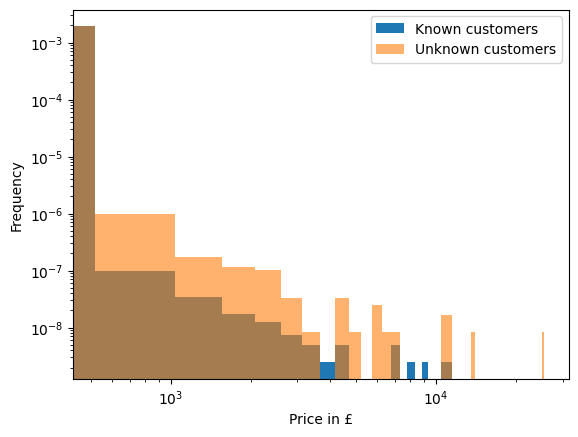

In [41]:
bounds=(0, 26000)
bins=50
ax = dt.dropna()["Price"].plot(kind="hist", range=bounds, bins=bins, density=True, label="Known customers")
_ = dt[dt["Customer ID"].isnull()]["Price"].plot(kind="hist", range=bounds, bins=bins, alpha=0.6, density=True, 
                                                 label="Unknown customers")
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Price in £")
_ = ax.legend()

In [42]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

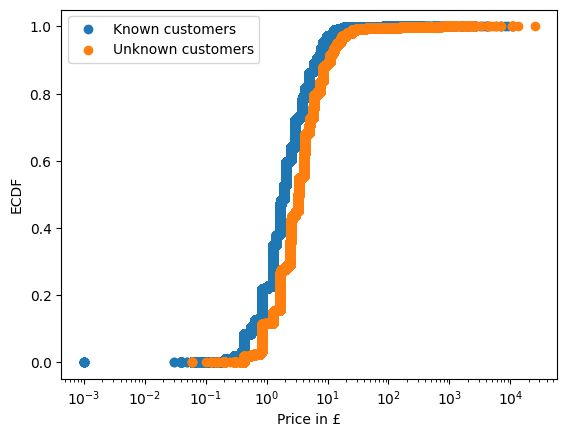

In [43]:
price_known = dt.dropna()["Price"].values
price_unknown = dt[dt["Customer ID"].isnull()]["Price"].values

f, ax = plt.subplots()
ax.scatter(*ecdf(price_known), label="Known customers")
ax.scatter(*ecdf(price_unknown), label="Unknown customers")
ax.set_xscale("log")
ax.set_ylabel("ECDF")
ax.set_xlabel("Price in £")
ax.legend()

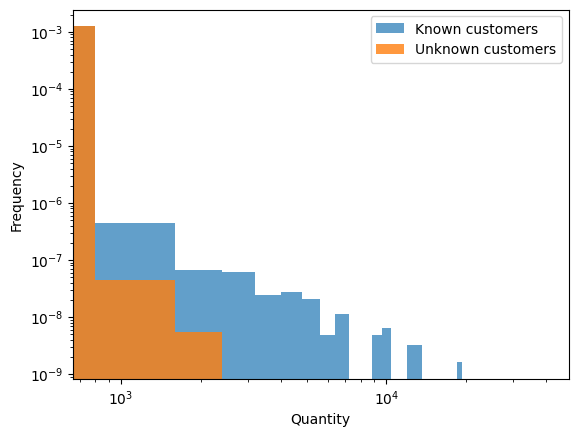

In [44]:
bounds=(0, 40000)
bins=50
ax = dt.dropna()["Quantity"].plot(kind="hist", range=bounds, bins=bins, density=True, label="Known customers", alpha=0.7)
_ = dt[dt["Customer ID"].isnull()]["Quantity"].plot(kind="hist", range=bounds, bins=bins, density=True, 
                                                    label="Unknown customers", alpha=0.8)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Quantity")
_ = ax.legend()

Non-subscribed customers tend to focus on expensive but low-volume products and vice versa for registered customers. And finally, unregistered customers tend to pay higher bills per invoice than registered customers

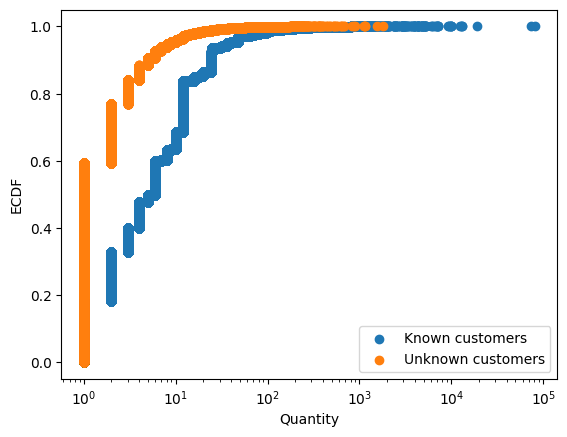

In [45]:
quant_known = dt.dropna()["Quantity"].values
quant_unknown = dt[dt["Customer ID"].isnull()]["Quantity"].values

f, ax = plt.subplots()
ax.scatter(*ecdf(quant_known), label="Known customers")
ax.scatter(*ecdf(quant_unknown), label="Unknown customers")
ax.set_xscale("log")
ax.set_ylabel("ECDF")
ax.set_xlabel("Quantity")
ax.legend()

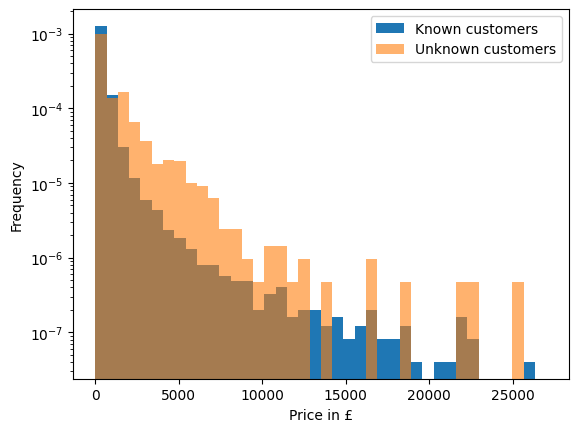

In [46]:
df_inv = dt.dropna().groupby("Invoice").agg({"TotalPrice": "sum", "Quantity":"sum"})
df_inv_na = dt[dt["Customer ID"].isnull()].groupby("Invoice").agg({"TotalPrice": "sum", "Quantity":"sum"})

bounds=(0, 27000)
bins=40
ax = df_inv["TotalPrice"].plot(kind="hist", range=bounds, bins=bins, density=True, label="Known customers")
_ = df_inv_na["TotalPrice"].plot(kind="hist", range=bounds, bins=bins, alpha=0.6, density=True, label="Unknown customers")
ax.set_yscale("log")
#ax.set_xscale("log")
ax.set_xlabel("Price in £")
_ = ax.legend()

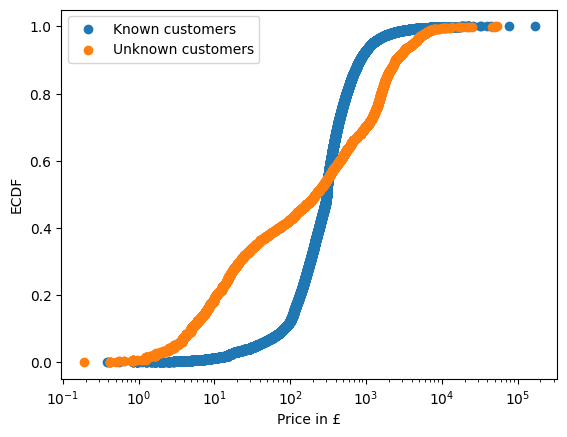

In [47]:
totprice_known = dt.dropna().groupby("Invoice")["TotalPrice"].sum().values
totprice_unknown = dt[dt["Customer ID"].isnull()].groupby("Invoice")["TotalPrice"].sum().values

f, ax = plt.subplots()
ax.scatter(*ecdf(totprice_known), label="Known customers")
ax.scatter(*ecdf(totprice_unknown), label="Unknown customers")
ax.set_xscale("log")
ax.set_ylabel("ECDF")
ax.set_xlabel("Price in £")
ax.legend()

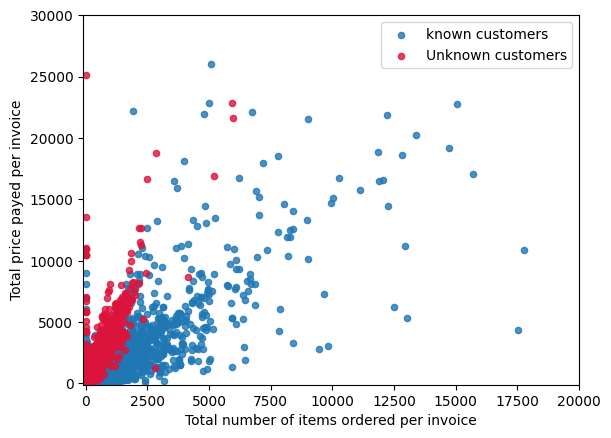

In [48]:
ax = df_inv.plot(kind="scatter", x="Quantity", y="TotalPrice", alpha=0.8, label="known customers")
df_inv_na.plot(kind="scatter", x="Quantity", y="TotalPrice", ax=ax, color="crimson", alpha=0.8, label="Unknown customers")
ax.set_ylim(-100, 30000)
ax.set_xlim(-100, 20000)
ax.set_ylabel("Total price payed per invoice")
ax.set_xlabel("Total number of items ordered per invoice")
_ = ax.legend()

Customers tend to buy more in the last months of the year and this is true for both registered and non-registered customers.

In [49]:
dt['CustomerType'] = dt['Customer ID'].notna().map({True: 'Known', False: 'Unknown'})

dt['Month'] = pd.to_datetime(dt['InvoiceDate']).dt.month

monthly_sales = dt.groupby(['CustomerType', 'Month'])['Quantity'].sum().unstack()

print(monthly_sales)


Month             1       2       3       4       5       6       7       8   \
CustomerType                                                                   
Known         718535  636888  849682  641948  757824  752886  691992  849915   
Unknown        59216   27925   52943   32705   33045   42445   45596   43485   

Month              9        10       11      12  
CustomerType                                     
Known         1110805  1187975  1318991  996460  
Unknown         42632    53050   157547  100607  


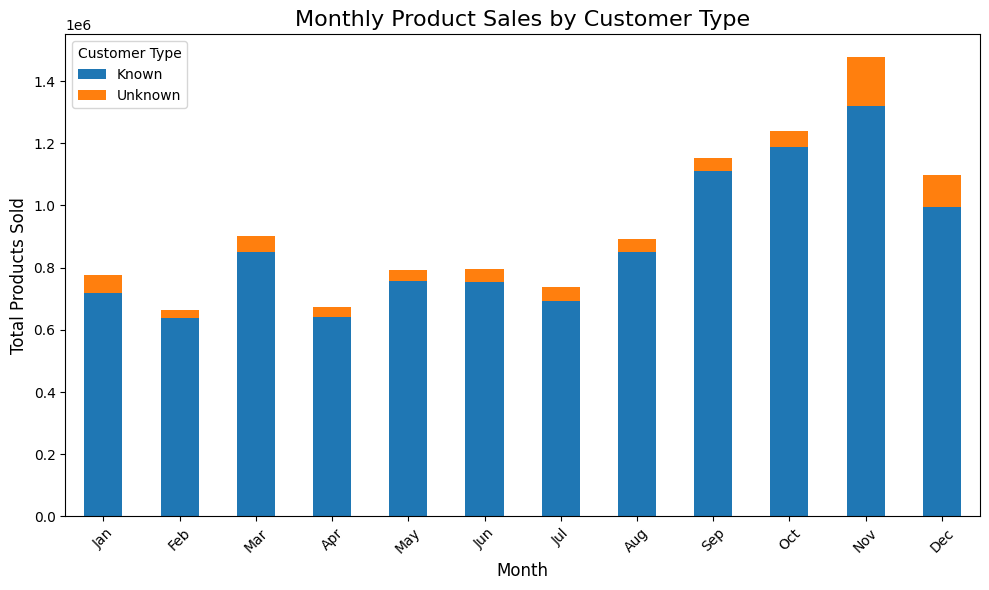

In [50]:

ax = monthly_sales.T.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title("Monthly Product Sales by Customer Type", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Products Sold", fontsize=12)
plt.legend(title="Customer Type", fontsize=10)
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
plt.tight_layout()
plt.show()


As shown in the plot below, we can see that almost all orders and revenue come from the **United Kingdom**

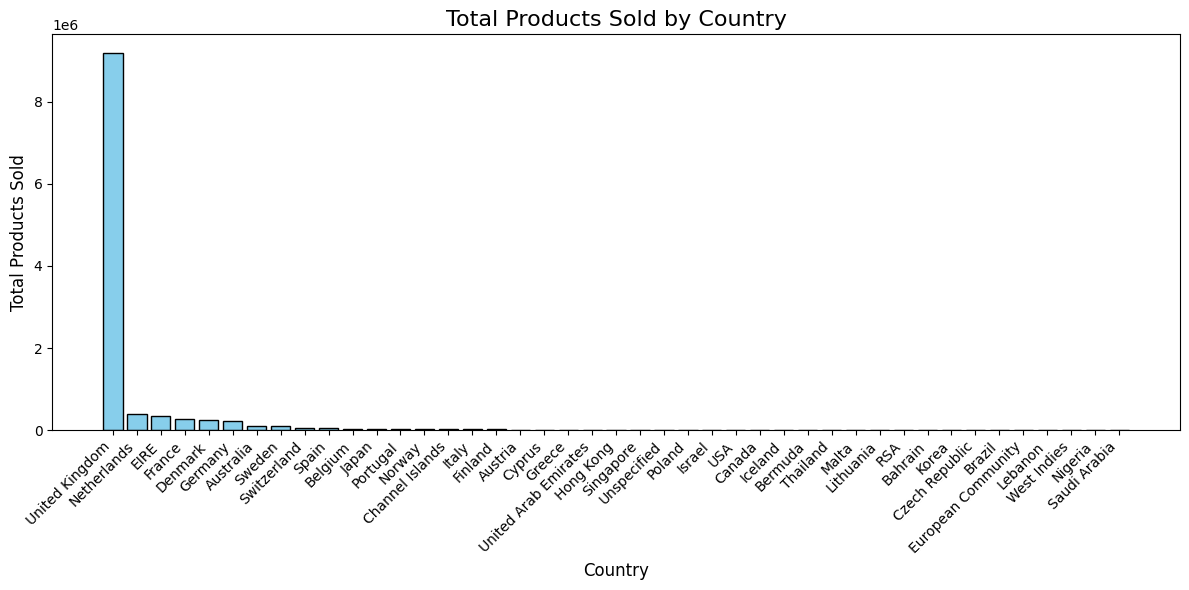

In [51]:

products_by_country = dt.groupby('Country').agg({'Quantity': 'sum'}).reset_index()

# Sort by total quantity for better visualization
products_by_country = products_by_country.sort_values(by='Quantity', ascending=False)

# Plot the data as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(products_by_country['Country'], products_by_country['Quantity'], color='skyblue', edgecolor='black')
plt.title("Total Products Sold by Country", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Products Sold", fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()
plt.show()


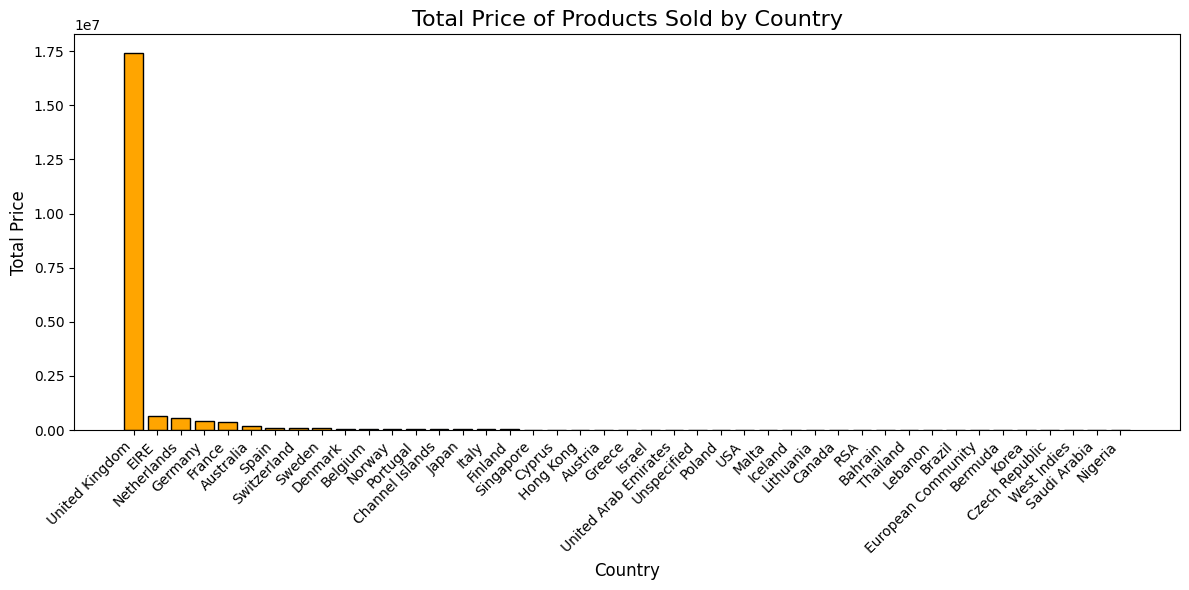

In [52]:
# Group by 'Country' and calculate the total price of products sold
total_price_by_country = dt.groupby('Country').agg({'TotalPrice': 'sum'}).reset_index()

# Sort by total price for better visualization
total_price_by_country = total_price_by_country.sort_values(by='TotalPrice', ascending=False)

# Plot the data as a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(total_price_by_country['Country'], total_price_by_country['TotalPrice'], color='orange', edgecolor='black')
plt.title("Total Price of Products Sold by Country", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Price", fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()
plt.show()

# 3. CLustering

In [53]:
# Aggregating data by Customer ID
customer_data = dt.groupby('Customer ID').agg(
    TotalQuantity=('Quantity', 'sum'),
    TotalRevenue=('TotalPrice', 'sum'),
    UniqueProducts=('StockCode', 'nunique'),
    Country=('Country', 'first')
).reset_index()

In [54]:
# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['TotalQuantity', 'TotalRevenue', 'UniqueProducts']])

## 3.1 K-Means Clustering

In [55]:
# Range of K values to try
k_values = range(2, 12)

# Lists to store scores
silhouette_scores = []
calinski_scores = []
davies_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    
    # Calculate scores
    silhouette_scores.append(silhouette_score(scaled_data, labels))
    calinski_scores.append(calinski_harabasz_score(scaled_data, labels))
    davies_scores.append(davies_bouldin_score(scaled_data, labels))

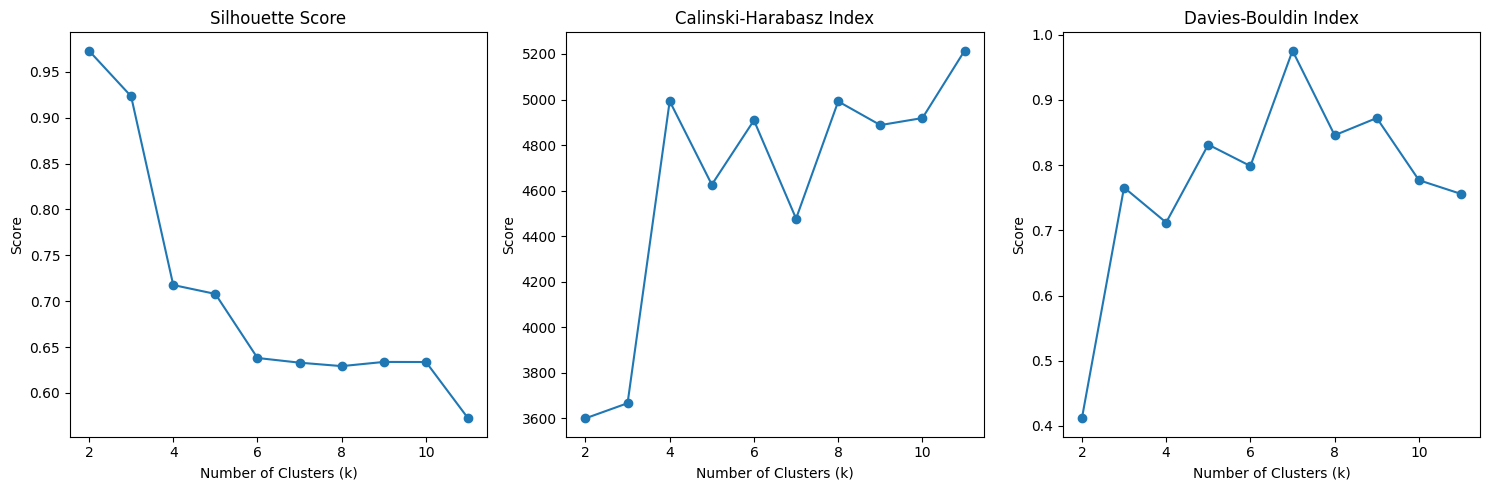

In [56]:
# Plot the scores
plt.figure(figsize=(15, 5))

# Silhouette Score
plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')

# Calinski-Harabasz Score
plt.subplot(1, 3, 2)
plt.plot(k_values, calinski_scores, marker='o')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')

# Davies-Bouldin Score
plt.subplot(1, 3, 3)
plt.plot(k_values, davies_scores, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

* Silhouette Score:
    * The silhouette score is highest at K=2 but starts to drop sharply after K=4.
    * This indicates that K=4 is a good balance between well-separated clusters and avoiding too few clusters.
* Calinski-Harabasz Index:
    * The Calinski-Harabasz score increases steadily and reaches a local peak at K=4.
    * This shows that K=4 provides the best balance between the compactness of clusters and the separation between clusters.
* Davies-Bouldin Index:
    * The Davies-Bouldin score is lowest at K=4, indicating better cluster separation.
    * A lower Davies-Bouldin index means better-defined clusters.

=> Final Verdict:
Considering all three methods:

K = 4 is the most suitable number of clusters based on the Silhouette Score, Calinski-Harabasz Index, and Davies-Bouldin Index.

In [57]:
# Final cluster selection based on optimal k
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['ClusterID'] = kmeans.fit_predict(scaled_data)

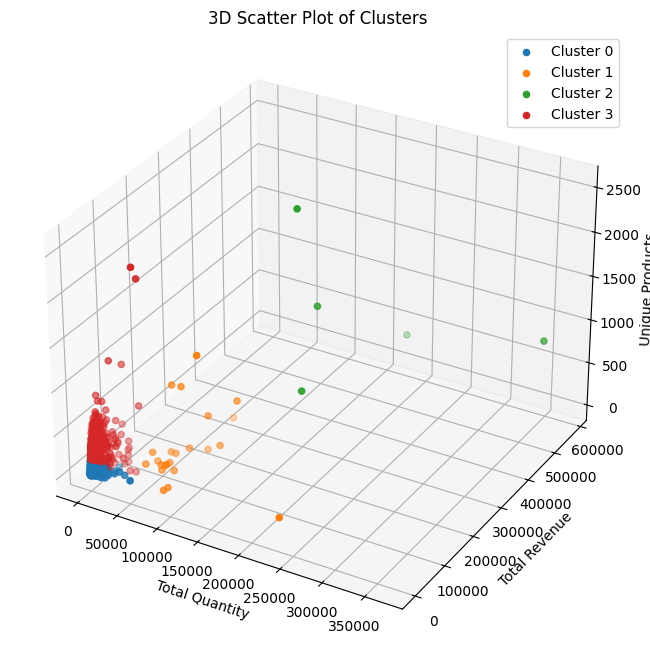

In [58]:
# Visualizing clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Sort the cluster IDs before plotting
for cluster_id in sorted(customer_data['ClusterID'].unique()):
    cluster_subset = customer_data[customer_data['ClusterID'] == cluster_id]
    ax.scatter(
        cluster_subset['TotalQuantity'],
        cluster_subset['TotalRevenue'],
        cluster_subset['UniqueProducts'],
        label=f'Cluster {cluster_id}'
    )

ax.set_xlabel('Total Quantity')
ax.set_ylabel('Total Revenue')
ax.set_zlabel('Unique Products')
ax.set_title('3D Scatter Plot of Clusters')
ax.legend()
plt.show()

In [59]:
# Analyzing cluster characteristics
cluster_summary = customer_data.groupby('ClusterID').agg(
    AvgQuantity=('TotalQuantity', 'mean'),
    AvgRevenue=('TotalRevenue', 'mean'),
    AvgUniqueProducts=('UniqueProducts', 'mean'),
    CountryCount=('Country', 'count')
).reset_index()

# Style the DataFrame with formatting and full center alignment
styled_summary = cluster_summary.style.format({
    'AvgQuantity': '{:,.2f}',
    'AvgRevenue': '£{:,.2f}',
    'AvgUniqueProducts': '{:,.2f}',
    'CountryCount': '{:,.0f}'
}).set_caption("K-Means Cluster Analysis Summary").set_table_attributes('style="border-collapse:collapse; width:100%;"') \
  .hide(axis='index') \
  .set_properties(**{'text-align': 'center'}) \
  .set_table_styles([
      {'selector': 'th', 'props': [('text-align', 'center')]},  # Center align headers
      {'selector': 'caption', 'props': [('font-size', '20px'), ('font-weight', 'bold'), ('text-align', 'center')]}  # Title styling
  ])

# Display the styled DataFrame
styled_summary


ClusterID,AvgQuantity,AvgRevenue,AvgUniqueProducts,CountryCount
0,800.89,"£1,360.70",49.64,"5,111"
1,"80,724.04","£97,115.87",254.91,23
2,"209,867.20","£382,017.74","1,247.00",5
3,"4,755.82","£8,492.94",292.47,739


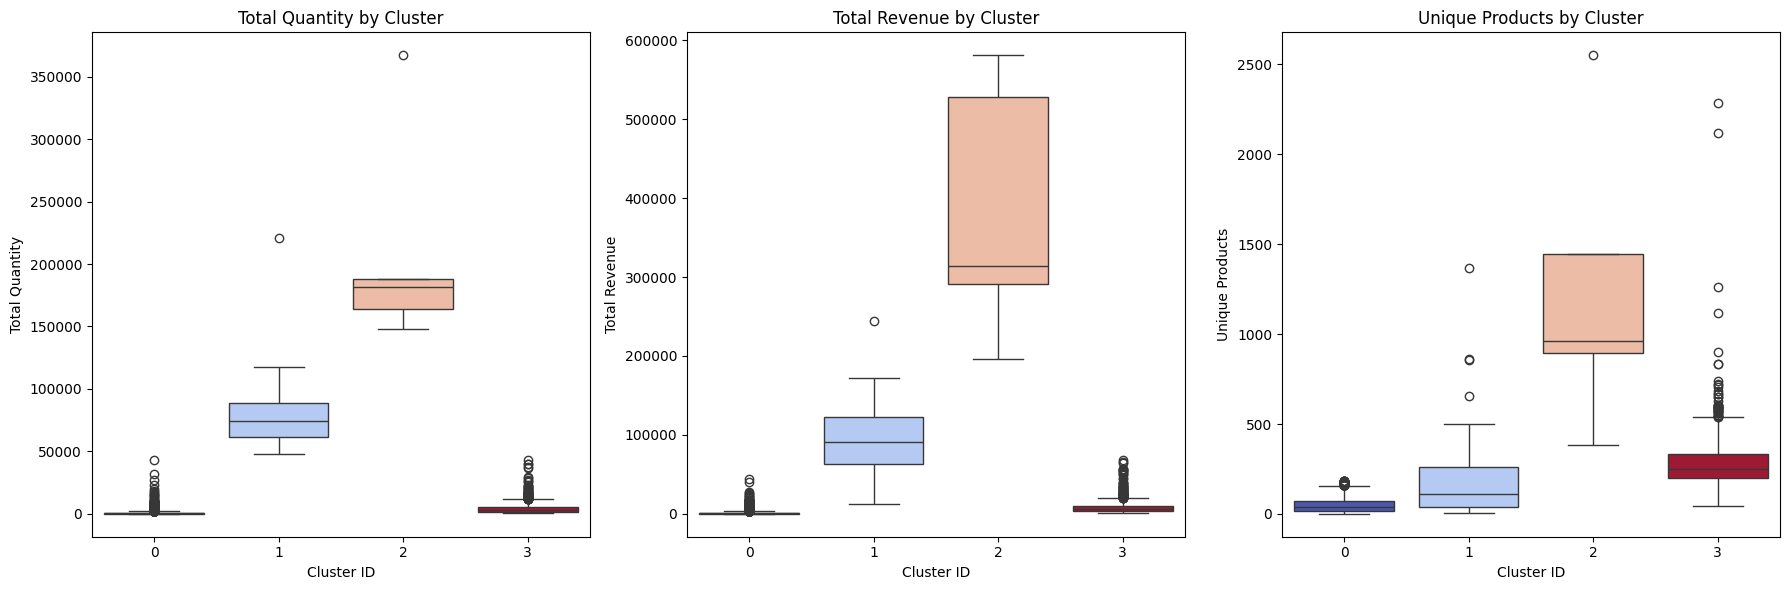

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot for Total Quantity
sns.boxplot(data=customer_data, x='ClusterID', y='TotalQuantity', ax=axes[0], hue='ClusterID', palette='coolwarm', dodge=False)
axes[0].legend_.remove()  # Remove legend
axes[0].set_title('Total Quantity by Cluster')
axes[0].set_xlabel('Cluster ID')
axes[0].set_ylabel('Total Quantity')

# Box plot for Total Revenue
sns.boxplot(data=customer_data, x='ClusterID', y='TotalRevenue', ax=axes[1], hue='ClusterID', palette='coolwarm', dodge=False)
axes[1].legend_.remove()
axes[1].set_title('Total Revenue by Cluster')
axes[1].set_xlabel('Cluster ID')
axes[1].set_ylabel('Total Revenue')

# Box plot for Unique Products
sns.boxplot(data=customer_data, x='ClusterID', y='UniqueProducts', ax=axes[2], hue='ClusterID', palette='coolwarm', dodge=False)
axes[2].legend_.remove()
axes[2].set_title('Unique Products by Cluster')
axes[2].set_xlabel('Cluster ID')
axes[2].set_ylabel('Unique Products')

plt.tight_layout()
plt.show()

## 3.2 Hierarchical Clustering (Agglomerative)

In [61]:
# Applying Hierarchical Clustering (Agglomerative)
hierarchical = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
customer_data['ClusterID_Hierarchical'] = hierarchical.fit_predict(scaled_data)

# Check the cluster distribution
print(customer_data['ClusterID_Hierarchical'].value_counts())

ClusterID_Hierarchical
1    5450
3     396
0      30
2       2
Name: count, dtype: int64


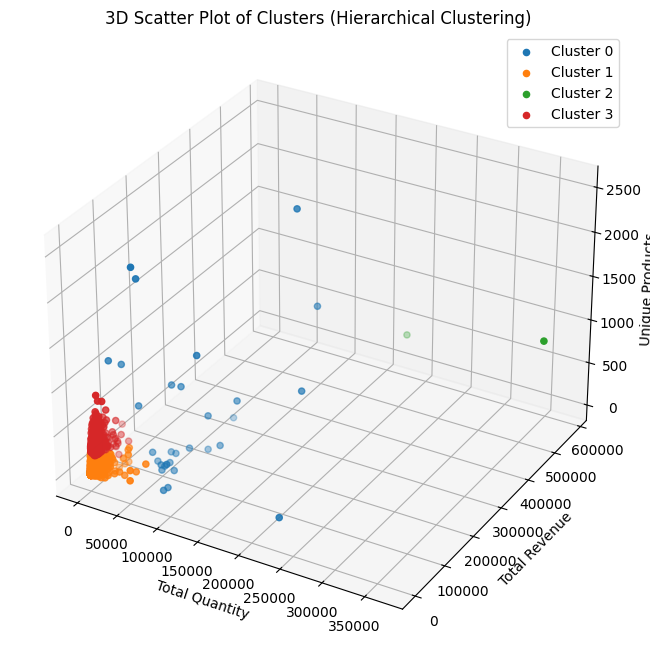

In [62]:
# Visualizing clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot clusters
for cluster_id in sorted(customer_data['ClusterID_Hierarchical'].unique()):
    cluster_subset = customer_data[customer_data['ClusterID_Hierarchical'] == cluster_id]
    ax.scatter(
        cluster_subset['TotalQuantity'],
        cluster_subset['TotalRevenue'],
        cluster_subset['UniqueProducts'],
        label=f'Cluster {cluster_id}'
    )

ax.set_xlabel('Total Quantity')
ax.set_ylabel('Total Revenue')
ax.set_zlabel('Unique Products')
ax.set_title('3D Scatter Plot of Clusters (Hierarchical Clustering)')
ax.legend()
plt.show()

In [63]:
# Analyzing cluster characteristics for Hierarchical Clustering
cluster_summary = customer_data.groupby('ClusterID_Hierarchical').agg(
    AvgQuantity=('TotalQuantity', 'mean'),
    AvgRevenue=('TotalRevenue', 'mean'),
    AvgUniqueProducts=('UniqueProducts', 'mean'),
    CustomerCount=('Customer ID', 'count')
).reset_index()

# Style the DataFrame with formatting and full center alignment
styled_summary = cluster_summary.style.format({
    'AvgQuantity': '{:,.2f}',
    'AvgRevenue': '£{:,.2f}',
    'AvgUniqueProducts': '{:,.2f}',
    'CustomerCount': '{:,.0f}'
}).set_caption("Hierarchical Clustering Analysis Summary").set_table_attributes('style="border-collapse:collapse; width:100%;"') \
  .hide(axis='index') \
  .set_properties(**{'text-align': 'center'}) \
  .set_table_styles([
      {'selector': 'th', 'props': [('text-align', 'center')]},  # Center align headers
      {'selector': 'caption', 'props': [('font-size', '20px'), ('font-weight', 'bold'), ('text-align', 'center')]}  # Title styling
  ])

# Display the styled DataFrame
styled_summary


ClusterID_Hierarchical,AvgQuantity,AvgRevenue,AvgUniqueProducts,CustomerCount
0,"81,727.03","£108,680.75",605.00,30
1,999.40,"£1,701.84",58.86,"5,450"
2,"274,419.00","£554,794.78",671.50,2
3,"5,218.46","£9,418.00",357.71,396


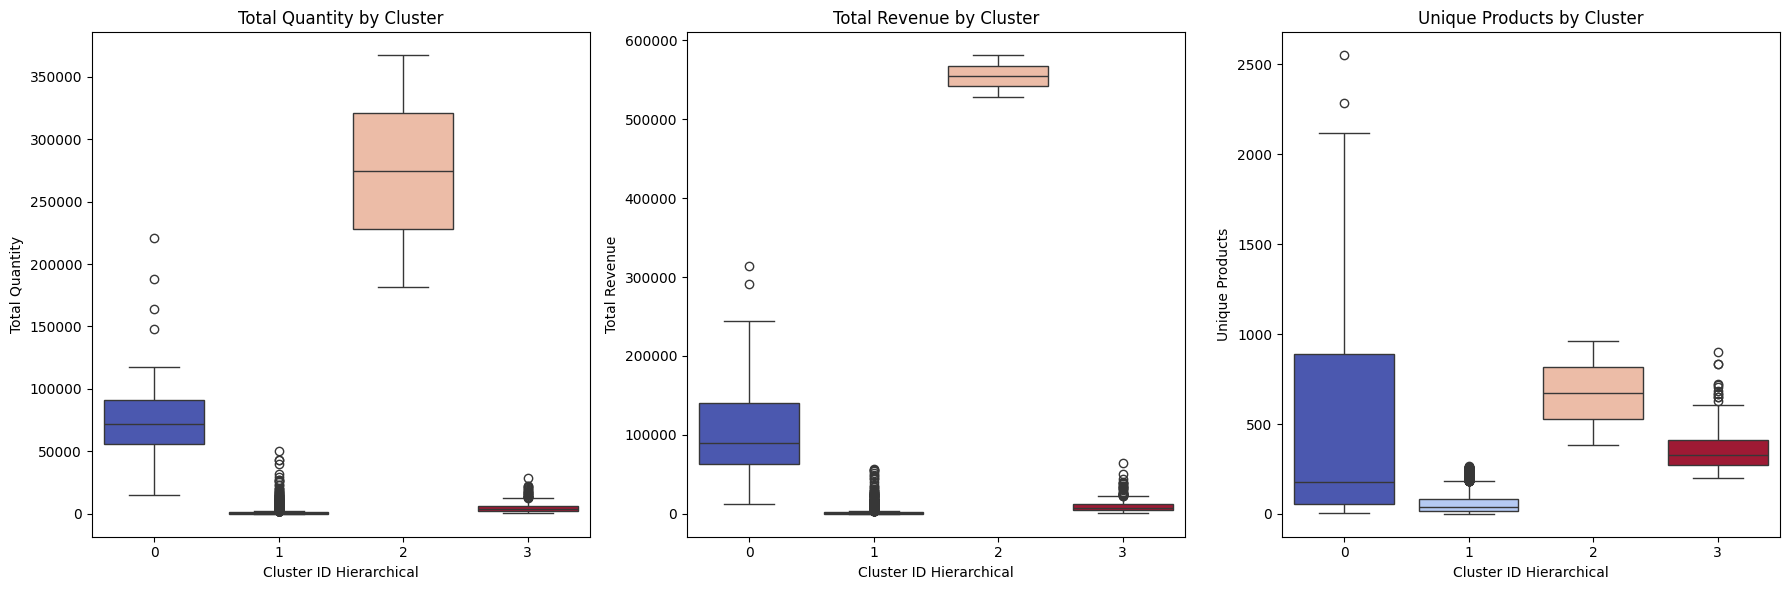

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot for Total Quantity
sns.boxplot(data=customer_data, x='ClusterID_Hierarchical', y='TotalQuantity', ax=axes[0], hue='ClusterID_Hierarchical', palette='coolwarm', dodge=False)
axes[0].legend_.remove()  # Remove legend
axes[0].set_title('Total Quantity by Cluster')
axes[0].set_xlabel('Cluster ID Hierarchical')
axes[0].set_ylabel('Total Quantity')

# Box plot for Total Revenue
sns.boxplot(data=customer_data, x='ClusterID_Hierarchical', y='TotalRevenue', ax=axes[1], hue='ClusterID_Hierarchical', palette='coolwarm', dodge=False)
axes[1].legend_.remove()
axes[1].set_title('Total Revenue by Cluster')
axes[1].set_xlabel('Cluster ID Hierarchical')
axes[1].set_ylabel('Total Revenue')

# Box plot for Unique Products
sns.boxplot(data=customer_data, x='ClusterID_Hierarchical', y='UniqueProducts', ax=axes[2], hue='ClusterID_Hierarchical', palette='coolwarm', dodge=False)
axes[2].legend_.remove()
axes[2].set_title('Unique Products by Cluster')
axes[2].set_xlabel('Cluster ID Hierarchical')
axes[2].set_ylabel('Unique Products')

plt.tight_layout()
plt.show()

## 3.3 Summary

### Overall Cluster Summary for K-Means and Hierarchical Clustering

- **Cluster 0**: Small-scale buyers generating low revenue. Focus on promotions and loyalty incentives to increase purchases.
- **Cluster 1**: Medium-scale buyers who purchase in bulk. Building relationships and offering bulk deals can ensure steady revenue.
- **Cluster 2**: High-value customers or large-scale wholesalers. These customers generate the highest revenue. Retention through personalized services and exclusive offers is essential.
- **Cluster 3**: Regular customers contributing steady revenue. Focus on upselling, cross-selling, and loyalty programs to maximize revenue.

Both methods yielded similar clusters, with slight variations. **K-Means is more scalable**, while **Hierarchical Clustering offers better subgroup insights.**

# 4. Regression

### Define Features and Target

In [65]:
# Define the independent variables (features) and the dependent variable (target)
dt['Country'] = LabelEncoder().fit_transform(dt['Country'])

X = dt[['Quantity', 'Price', 'Country']]  # Reassign X after encoding
y = dt['TotalPrice']

# Display the first few rows of features and target
print("Preview of Features (X):")
print(X.head())
print("\nPreview of Target (y):")
print(y.head())

# Scale features
print("Scaling features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of scaled features
print("\nPreview of Scaled Features:")
print(pd.DataFrame(X_scaled, columns=['Quantity', 'Price', 'Country']).head())

# Split data into training and testing sets
print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Display the shape of the training and testing sets
print("\nShapes of training and testing sets:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

Preview of Features (X):
   Quantity  Price  Country
0        12   6.95       40
1        12   6.75       40
2        12   6.75       40
3        48   2.10       40
4        24   1.25       40

Preview of Target (y):
0     83.4
1     81.0
2     81.0
3    100.8
4     30.0
Name: TotalPrice, dtype: float64
Scaling features...

Preview of Scaled Features:
   Quantity     Price   Country
0  0.006871  0.057024  0.273455
1  0.006871  0.053058  0.273455
2  0.006871  0.053058  0.273455
3  0.287091 -0.039148  0.273455
4  0.100278 -0.056003  0.273455
Splitting data into training and testing sets...

Shapes of training and testing sets:
X_train: (705532, 3), X_test: (302371, 3)
y_train: (705532,), y_test: (302371,)


## 4.0. Checking all regression model MSE without tuning

In [ ]:
# Split data into train and test sets (replace X, y with your data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models to be evaluated
models = {
    'Linear Regression': Ridge(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNN Regressor': KNeighborsRegressor()
}

# Store results
model_results = {}

# Loop through each model, fit it, and calculate MSE
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    
    # Store the result
    model_results[model_name] = mse

# Display results
print("Model Comparison based on MSE:")
for model_name, mse in model_results.items():
    print(f"{model_name}: MSE = {mse:.2f}")

## 4.1. Random Forest Regression

In [ ]:
# Train the Random Forest Regression model and evaluate its performance
print("Training Random Forest Regressor...")

# Initialize the base Random Forest model
reg = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid for tuning
print("Defining hyperparameter grid...")
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest. Lower values train faster; higher values may improve accuracy.
    'max_depth': [None, 10, 20],     # Maximum depth of trees. None allows fully expanded trees.
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split an internal node. Higher values reduce overfitting.
}

# Perform Grid Search with cross-validation
print("Starting Grid Search...")
grid_search = GridSearchCV(
    estimator=reg, 
    param_grid=param_grid, 
    cv=3, 
    scoring='neg_mean_squared_error', 
    verbose=1
)
grid_search.fit(X_train, y_train)  # Train the model with Grid Search

# Retrieve the best hyperparameters
best_params = grid_search.best_params_
print("\nBest Parameters Found:")
print(best_params)

# Train the model using the best hyperparameters
print("\nTraining the model with the best parameters...")
best_reg = RandomForestRegressor(**best_params, random_state=42)
best_reg.fit(X_train, y_train)

# Make predictions on the test set
print("\nMaking predictions...")
predictions = best_reg.predict(X_test)

# Evaluate the model's performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")

# # Display a summary of Grid Search results
# print("\nGrid Search Results:")
# # Loop through the Grid Search results to display each parameter combination with its mean score
# for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
#     print(f"Mean MSE: {-mean_score:.2f}, Parameters: {params}")

## 4.2. Decision Tree Regression

In [ ]:
# Train the Decision Tree Regression model and evaluate its performance
print("Training Decision Tree Regressor...")

# Initialize the base Decision Tree model
reg = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid for tuning
print("Defining hyperparameter grid...")
param_grid = {
    'max_depth': [None, 10, 20],  # Maximum depth of the tree. None means no limit on the depth.
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node.
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node.
    'max_features': [None, 'sqrt', 'log2']  # The number of features to consider when looking for the best split.
}

# Perform Grid Search with cross-validation
print("Starting Grid Search...")
grid_search = GridSearchCV(
    estimator=reg, 
    param_grid=param_grid, 
    cv=3, 
    scoring='neg_mean_squared_error', 
    verbose=1
)
grid_search.fit(X_train, y_train)  # Train the model with Grid Search

# Retrieve the best hyperparameters
best_params = grid_search.best_params_
print("\nBest Parameters Found:")
print(best_params)

# Train the model using the best hyperparameters
print("\nTraining the model with the best parameters...")
best_reg = DecisionTreeRegressor(**best_params, random_state=42)
best_reg.fit(X_train, y_train)

# Make predictions on the test set
print("\nMaking predictions...")
predictions = best_reg.predict(X_test)

# Evaluate the model's performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")

# # Display a summary of Grid Search results
# print("\nGrid Search Results:")
# # Loop through the Grid Search results to display each parameter combination with its mean score
# for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
#     print(f"Mean MSE: {-mean_score:.2f}, Parameters: {params}")

## 4.3. Ridge Regression

In [ ]:
# Train the Ridge Regression model and evaluate its performance
print("Training Ridge Regression Model...")

# Initialize the base Ridge Regression model
reg = Ridge()

# Define the hyperparameter grid for tuning
print("Defining hyperparameter grid...")
param_grid = {
    'alpha': [0.1, 1, 10, 100, 200, 250, 300, 350, 400, 450, 500]  # Regularization strength for Ridge regression
}

# Perform Grid Search with cross-validation
print("Starting Grid Search...")
grid_search = GridSearchCV(
    estimator=reg, 
    param_grid=param_grid, 
    cv=3, 
    scoring='neg_mean_squared_error', 
    verbose=1
)
grid_search.fit(X_train, y_train)  # Train the model with Grid Search

# Retrieve the best hyperparameters
best_params = grid_search.best_params_
print("\nBest Parameters Found:")
print(best_params)

# Train the model using the best hyperparameters
print("\nTraining the model with the best parameters...")
best_reg = Ridge(**best_params)  # Using Ridge with the best found alpha
best_reg.fit(X_train, y_train)

# Make predictions on the test set
print("\nMaking predictions...")
predictions = best_reg.predict(X_test)

# Evaluate the model's performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")

# # Display a summary of Grid Search results
# print("\nGrid Search Results:")
# # Loop through the Grid Search results to display each parameter combination with its mean score
# for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
#     print(f"Mean MSE: {-mean_score:.2f}, Parameters: {params}")

## 4.4. Gradient Boosting Regressor

In [ ]:
# Train the Gradient Boosting Regressor model and evaluate its performance
print("Training Gradient Boosting Regressor...")

# Initialize the base Gradient Boosting model
reg = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid for tuning
print("Defining hyperparameter grid...")
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages to be used.
    'learning_rate': [0.01, 0.05, 0.1],  # Shrinks the contribution of each tree.
    'max_depth': [3, 5, 10],  # Maximum depth of the individual trees.
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used to fit each tree.
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split an internal node.
}

# Perform Grid Search with cross-validation
print("Starting Grid Search...")
grid_search = GridSearchCV(
    estimator=reg, 
    param_grid=param_grid, 
    cv=3, 
    scoring='neg_mean_squared_error',  # Use negative MSE as we are minimizing
    verbose=1
)
grid_search.fit(X_train, y_train)  # Train the model with Grid Search

# Retrieve the best hyperparameters
best_params = grid_search.best_params_
print("\nBest Parameters Found:")
print(best_params)

# Train the model using the best hyperparameters
print("\nTraining the model with the best parameters...")
best_reg = GradientBoostingRegressor(**best_params, random_state=42)
best_reg.fit(X_train, y_train)

# Make predictions on the test set
print("\nMaking predictions...")
predictions = best_reg.predict(X_test)

# Evaluate the model's performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")

# # Display a summary of Grid Search results
# print("\nGrid Search Results:")
# # Loop through the Grid Search results to display each parameter combination with its mean score
# for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
#     print(f"Mean MSE: {-mean_score:.2f}, Parameters: {params}")

### 4.5. Evaluate Model Performance and Compare Metrics (RMSE & MAE)

In [ ]:
# Define the models with their hyperparameter grids
model_params = {
    'Gradient Boosting Regressor': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 10],
            'subsample': [0.8, 0.9, 1.0],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Ridge Regression': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1, 10, 100, 200, 250, 300, 350, 400, 450, 500]
        }
    },
    'Decision Tree Regressor': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': [None, 'sqrt', 'log2']
        }
    },
    'Random Forest Regressor': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    }
}

# Store results
model_results = {}

# Loop through each model, perform hyperparameter tuning, and evaluate
for model_name, config in model_params.items():
    print(f"\nOptimizing and Evaluating {model_name}...")
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=3,
        scoring='neg_mean_squared_error',
        verbose=1
    )
    # Perform Grid Search
    grid_search.fit(X_train, y_train)

    # Retrieve the best model and its parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best Parameters for {model_name}: {best_params}")

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_test - y_pred))

    # Store results
    model_results[model_name] = {'RMSE': rmse, 'MAE': mae, 'Best Params': best_params}

    # Display individual results
    print(f"{model_name}:")
    print(f"  RMSE = {rmse:.2f}")
    print(f"  MAE = {mae:.2f}")

# Summary of results
print("\nModel Comparison Summary:")
for model_name, metrics in model_results.items():
    print(f"{model_name}: RMSE = {metrics['RMSE']:.2f}, MAE = {metrics['MAE']:.2f}, Best Params = {metrics['Best Params']}")

### 4.5.1. Visualization: Compare RMSE and MAE across models

In [ ]:
# Prepare data for plotting
model_names = list(model_results.keys())
rmse_values = [metrics['RMSE'] for metrics in model_results.values()]
mae_values = [metrics['MAE'] for metrics in model_results.values()]

# Plot RMSE and MAE
plt.figure(figsize=(10, 6))
plt.barh(model_names, rmse_values, alpha=0.6, label='RMSE')
plt.barh(model_names, mae_values, alpha=0.6, label='MAE')
plt.xlabel('Metric Value')
plt.ylabel('Model')
plt.title('Comparison of RMSE and MAE across Models (Optimized)')
plt.legend()
plt.show()

### 4.5.2. Comparison table for regression

Model name    | MSE  |      RMSE |  MAE
|----------|-------------|----------------|-----------------|
1.Random Forest Regression |646.76|25.43|2.41
2.Decision Tree Regression |1088.38|32.99|3.49
3.Ridge regression |3291.01|57.37|19.73
4.Gradient Boosting Regressor |534.13|23.11|3.47